In [29]:
import pandas as pd
import numpy as np
import plotnine as p9
from scipy import stats
import os

In [2]:
os.getcwd()

'/Users/pjk/Wunderkammer/AntheiaWorkshop/notebooks'

In [3]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 1.1.0


In [4]:
from tpot import TPOTRegressor

In [5]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.7.2


In [6]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('../data/DropOut_SummaryData.csv')

In [8]:
df01 = df.dropna()

In [9]:
df01_A = df01[df01['strain'] == 'Strain A']

In [10]:
df01_A['strain'].value_counts()

strain
Strain A    120
Name: count, dtype: int64

In [11]:
df02 = df01_A.drop(['Unnamed: 0', 'strain', 'type_of_doe', 'plate', 'condition', 'residual_glucose'], axis=1)

In [12]:
df02.reset_index(drop = True, inplace = True)

In [13]:
df02.head(5)

,p_h,glucose_g_l,ammonium_sulfate_g_l,phosphate_citrate_x,ynb_x,amino_acid_1_m_m,amino_acid_2_g_l,amino_acid_2_g_l_1,ethanol_g_l,mean_calc_OD60
0,4.5,35,3.0,0.2,1.25,3.5,0.50,0.0,5.0,6.626620
1,4.5,15,12.0,0.2,2.00,0.1,0.25,0.5,5.0,8.661971
2,4.5,15,3.0,1.0,2.00,0.1,0.50,0.0,2.5,7.967703
3,4.5,25,12.0,1.0,2.00,3.5,0.00,0.0,0.0,6.598677
4,4.5,35,7.5,1.0,0.50,0.1,0.50,0.5,0.0,7.104252


In [14]:
# split into input and output elements
X, y = df02.iloc[:, :-1], df02.iloc[:, -1]
print(X.shape, y.shape)

(120, 9) (120,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15 , random_state = 42)

In [35]:
# define evaluation procedure
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

In [36]:
model = TPOTRegressor(generations = 5,
                      population_size = 50,
                      cv = cv,
                      random_state = 42)

In [37]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
Generation: 100%|██████████| 5/5 [14:31<00:00, 174.22s/it]


,search_space,<tpot.search_...t 0x377af98d0>
,scorers,['neg_mean_squared_error']
,scorers_weights,[1]
,cv,RepeatedKFold...ndom_state=42)
,other_objective_functions,[]
,other_objective_functions_weights,[]
,objective_function_names,None
,bigger_is_better,True
,categorical_features,None
,memory,None
,preprocessing,False


In [38]:
preds = model.predict(X_test)

In [39]:
print(r2_score(y_test, preds))

0.6321070989943753


In [40]:
# Access the fitted pipeline
best_pipeline = model.fitted_pipeline_

# Inspect the 'best_pipeline' as a standard scikit-learn Pipeline
print(best_pipeline)

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('variancethreshold',
                 VarianceThreshold(threshold=0.0003878045217)),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('estimatortransfor...
                              feature_types=None, feature_weights=None,
                              gamma=1.3201905734239, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.0294350400044, max_bin=None,
           

In [41]:
results = pd.DataFrame({
    "pred": preds,
    "expt": y_test
})

In [42]:
results.sample(5)

,pred,expt
4,6.167304,7.104252
0,7.371150,6.626620
89,6.583185,6.676559
107,7.451468,8.112028
10,6.992348,6.780884


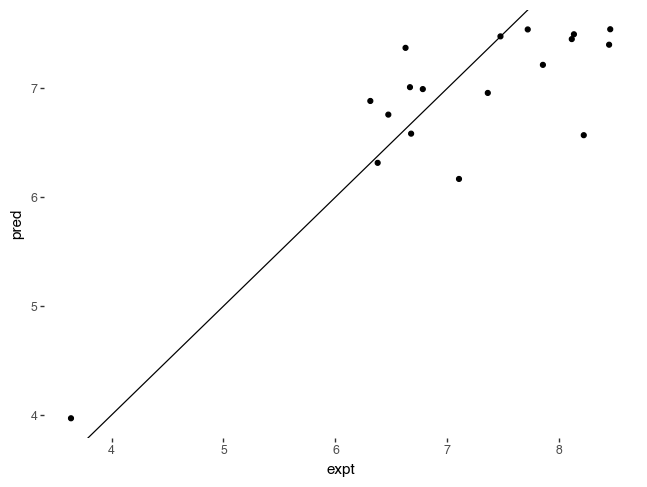

In [50]:
(
    p9.ggplot(results, aes(x = 'expt', y = 'pred'))
    + p9.geom_point()
    #+ p9.geom_smooth(method = 'lm', se = False)
    + p9.geom_abline(slope = 1.0, intercept = (0,0))
    + p9.theme_tufte()
)

In [44]:
results

,pred,expt
44,7.495695,8.131200
47,6.883373,6.312000
4,6.167304,7.104252
55,7.214868,7.854000
26,6.758003,6.472800
64,7.476416,7.474800
73,7.541854,8.455712
10,6.992348,6.780884
40,7.540154,7.718400
107,7.451468,8.112028
